In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib

# Load the data set
df = pd.read_csv("ml_house_data_set.csv")

# Remove the fields from the data set that we don't want to include in our model
del df['house_number']
del df['unit_number']
del df['street_name']
del df['zip_code']

# Replace categorical data with one-hot encoded data
features_df = pd.get_dummies(df, columns=['garage_type', 'city'])

# Remove the sale price from the feature data
del features_df['sale_price']

# Create the X and y arrays
X = features_df.as_matrix()
y = df['sale_price'].as_matrix()

# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fit regression model
model = ensemble.GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=9,
    max_features=0.1,
    loss='huber'
)
model.fit(X_train, y_train)

# Save the trained model to a file so we can use it in other programs
joblib.dump(model, 'model/trained_house_classifier_model.pkl')

# Find the error rate on the training set
mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)

# Find the error rate on the test set
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mae)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit (X_train,y_train)
pred=reg.predict(X_test)
mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
mae = mean_absolute_error(y_test,pred)
print("Test Set Mean Absolute Error : %.4f" % mae)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor()
reg.fit (X_train,y_train)
pred=reg.predict(X_test)
mae = mean_absolute_error(y_train, model.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mae)
mae = mean_absolute_error(y_test,pred)
print("Test Set Mean Absolute Error : %.4f" % mae)

In [ ]:
#Join Predicted values for X Train with Actual Values in a Dataframe and similarly for Test set
#Also add results of various methods on various metrics to a dataframe and visualize them
#If possible plot the error at each test point for each method as a line and create a plot that compares methods
train_val=pd.DataFrame({"Actual":y_train,"Pred":model.predict(X_train)})
test_val=pd.DataFrame({"Actual":y_test,"Pred":model.predict(X_test)})
test_val.head()

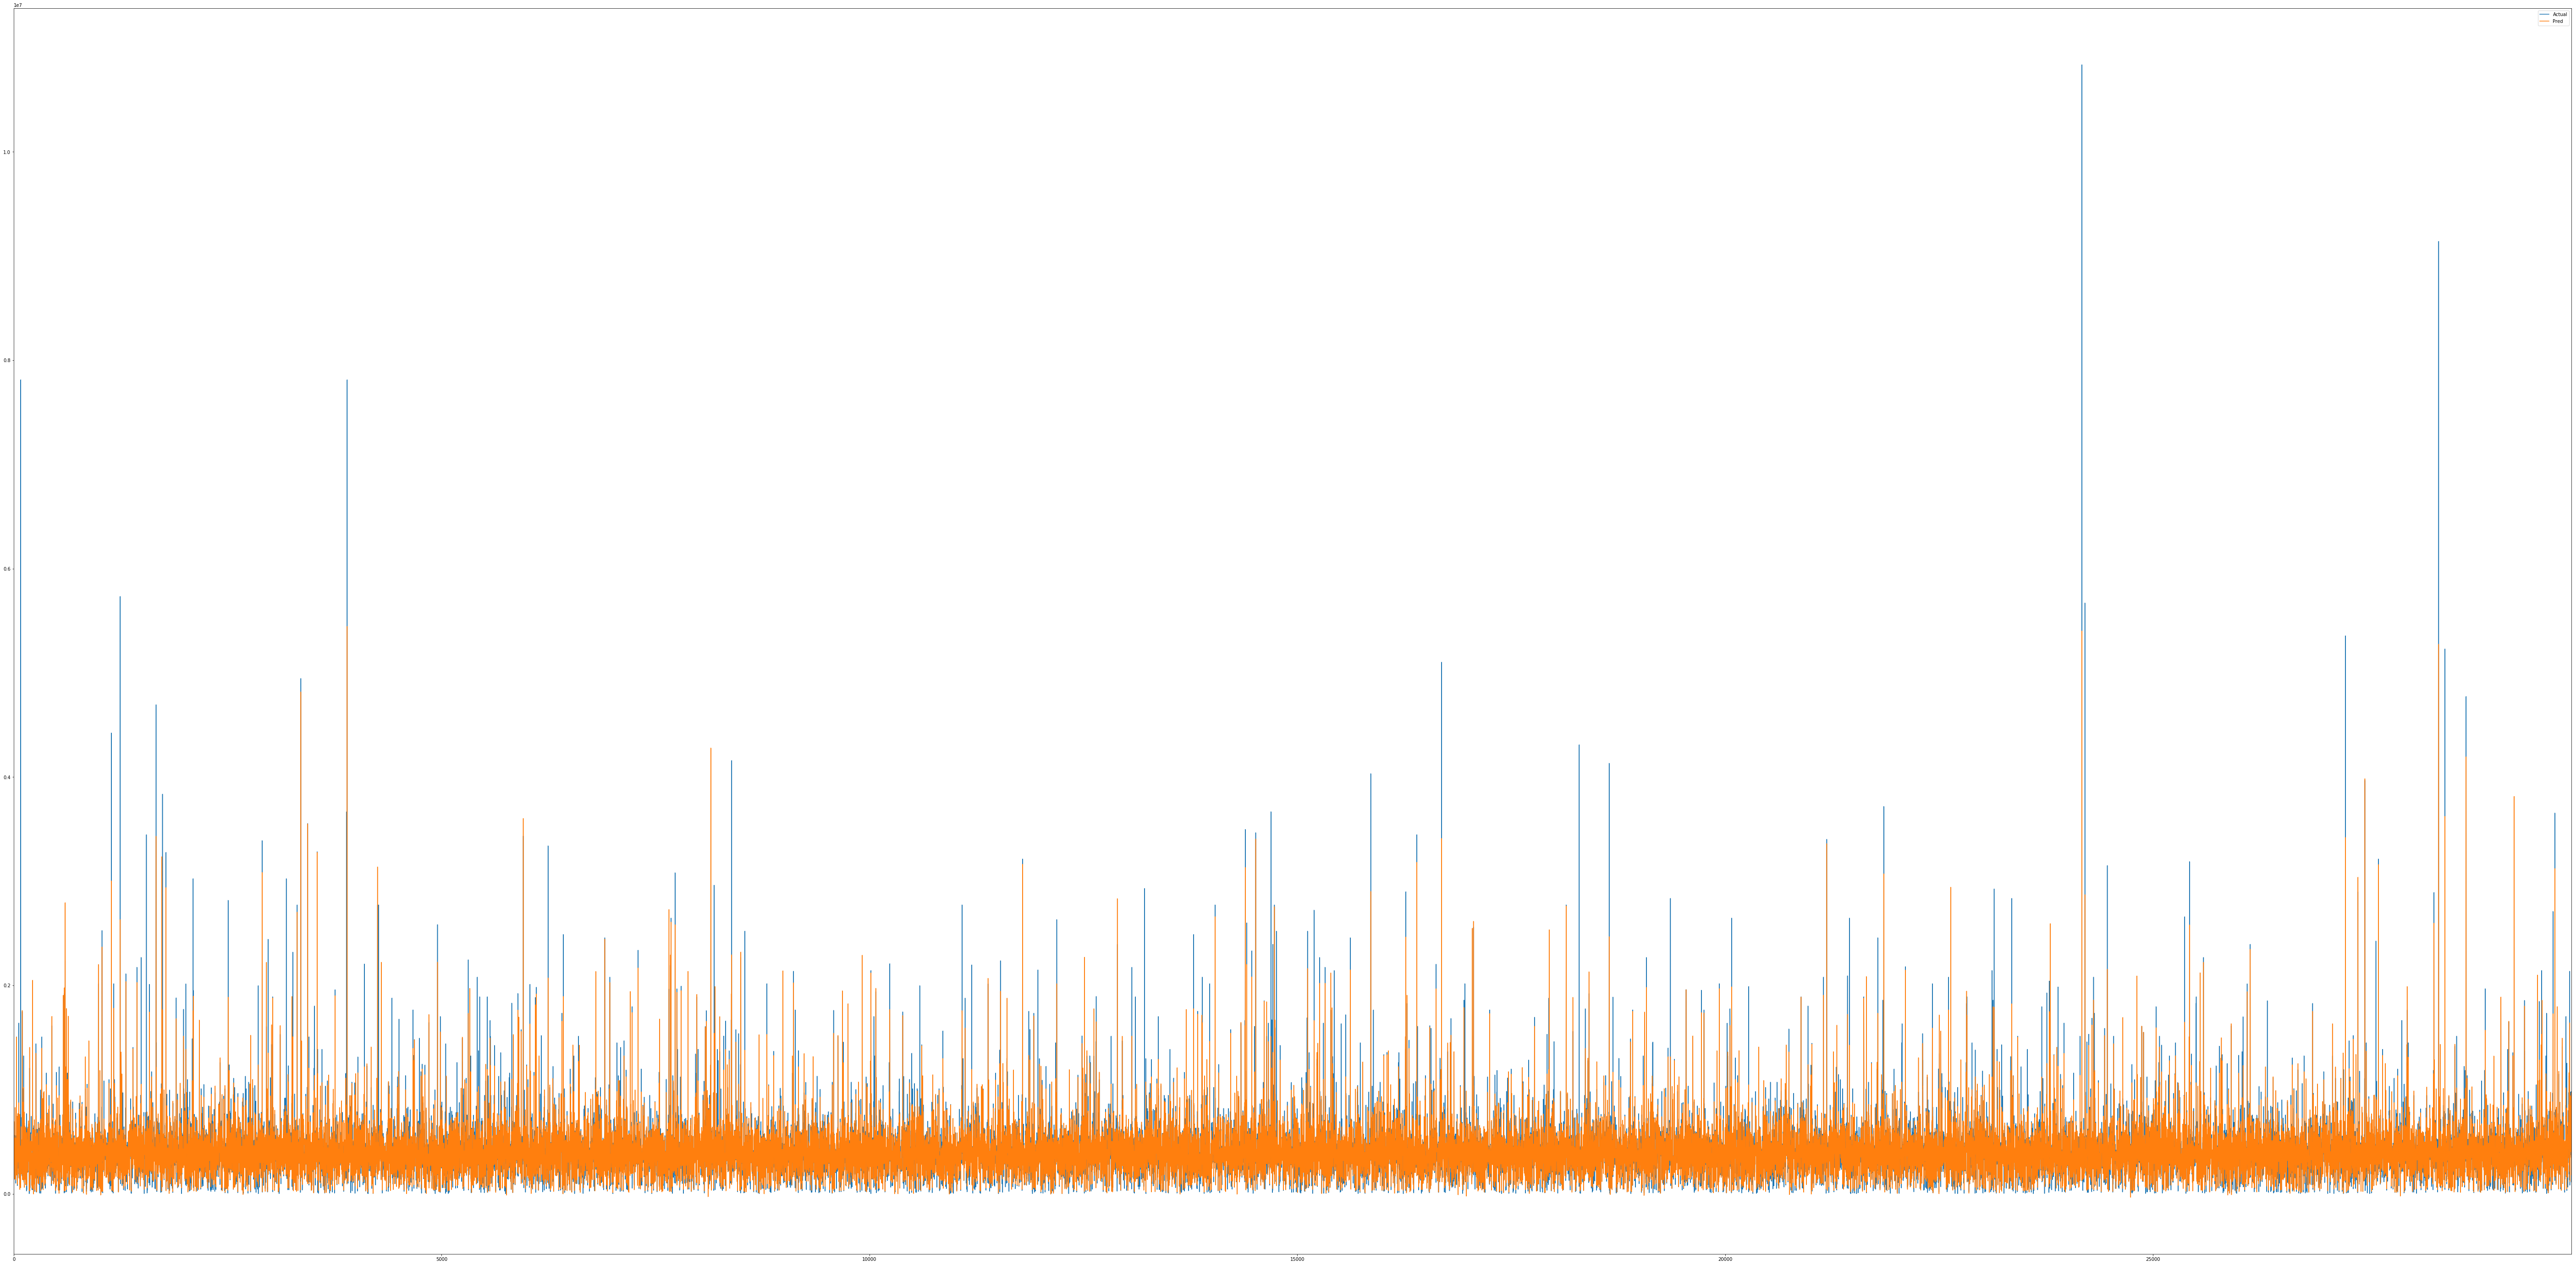

In [15]:
%matplotlib inline
train_val.plot(figsize=(100,50))

In [18]:
train_analysis=pd.DataFrame({"Actual":y_train,"Pred":model.predict(X_train)})
train_analysis=pd.concat([features_df,train_analysis],axis=1)
train_analysis.columns

Index([u'year_built', u'stories', u'num_bedrooms', u'full_bathrooms',
       u'half_bathrooms', u'livable_sqft', u'total_sqft', u'garage_sqft',
       u'carport_sqft', u'has_fireplace', u'has_pool', u'has_central_heating',
       u'has_central_cooling', u'garage_type_attached',
       u'garage_type_detached', u'garage_type_none', u'city_Amystad',
       u'city_Brownport', u'city_Chadstad', u'city_Clarkberg',
       u'city_Coletown', u'city_Davidfort', u'city_Davidtown',
       u'city_East Amychester', u'city_East Janiceville', u'city_East Justin',
       u'city_East Lucas', u'city_Fosterberg', u'city_Hallfort',
       u'city_Jeffreyhaven', u'city_Jenniferberg', u'city_Joshuafurt',
       u'city_Julieberg', u'city_Justinport', u'city_Lake Carolyn',
       u'city_Lake Christinaport', u'city_Lake Dariusborough',
       u'city_Lake Jack', u'city_Lake Jennifer', u'city_Leahview',
       u'city_Lewishaven', u'city_Martinezfort', u'city_Morrisport',
       u'city_New Michele', u'city_New Robi